# Read and manipulate data with the pandas library

## What you will learn in this course 🧐🧐

In Data Science, one of the libraries to know is Pandas. This library will allow you to manipulate databases very easily. So we're going to learn to:

* Read and write Excel & CSV files via Pandas
* Create databases
* Merging databases
* Manage missing data
* Manage categorical variables

## Data structures in Pandas

We have already seen a number of data types in Python. With Pandas, we are introducing two new data structures that need to be understood in order to move forward.

## Import pandas and discover the classes

Before we begin, let's not forget that for all the operations we show in this course, we have imported the Pandas library as follows. The instruction as allows to create an alias: in the following we will refer to the library with `pd`.

In [1]:
import pandas as pd

### Series class
A DataFrame that has only one dimension (one column) is a Series.

In [2]:
# For information on how to use a method, use the "?"
# Class Series : same as a column in Excel/SQL

pd.Series?


Init signature:
pd.Series(
    data=None,
    index=None,
    dtype: 'Dtype | None' = None,
    name=None,
    copy: 'bool | None' = None,
    fastpath: 'bool | lib.NoDefault' = <no_default>,
) -> 'None'
Docstring:     
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, \*, \*\*) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d)
    

#### Create an instance of the Series class and initialize it

In [3]:
# An instance of the Series class is created and initialized with a list of values.

data1 = pd.Series(data = [1.2, "Hello", 4.7, 6.7], name = "values")
data1

0      1.2
1    Hello
2      4.7
3      6.7
Name: values, dtype: object

#### "index" attribute

In [4]:
# The series have an index as attribute
data1.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
# Accessing an item in the series via the index: similar operation to lists
data1[2]

4.7

#### Iterate on a Series

In [6]:
# Iterate over the values of a series
print("Directly iterate over the values")
for values in data1:
    print(values)
# It's also possible to use the series' index to iterate

print("-------")
print("Same but with the index")
for index in data1.index:
    print(f"This is index {index} with value {data1[index]}")


Directly iterate over the values
1.2
Hello
4.7
6.7
-------
Same but with the index
This is index 0 with value 1.2
This is index 1 with value Hello
This is index 2 with value 4.7
This is index 3 with value 6.7


### The DataFrame class

A DataFrame is a succession of Series. It is a two-dimensional object with rows and columns. One can also think of a DataFrame as an excel sheet.

In [7]:
# A DataFrame is composed of several columns:


#### Declare an instance of the DataFrame class and initialize it

In [8]:
# We create an instance of the DataFrame class and initialize it with the values
data_dict = {
    'name': ['Agnes', 'Sidi', 'Thibault', 'Samia', 'Henry', 'Georges'],
    'age': [28, 37, 43, 33, 29, 57],
    'job': ['web analyst', 'sales director', 'web analyst', 'sales director',
                   'web analyst', 'developer']
            }

data2 = pd.DataFrame(data_dict)

display(data2)  # Equivalent to print() with HTML rendering

,name,age,job
0,Agnes,28,web analyst
1,Sidi,37,sales director
2,Thibault,43,web analyst
3,Samia,33,sales director
4,Henry,29,web analyst
5,Georges,57,developer


Here, we have buildta DataFrame composed of six lines and three columns _name_, _age_ and _job_. A lot of different operations/transformations can be done on Dataframes, we will describe the main ones later in the course.

#### Attributes "index", "columns", "shape", "values"

In [9]:
# Like Series, DataFrame has an 'index'  attribute :
data2.index

RangeIndex(start=0, stop=6, step=1)

In [10]:
# The 'columns' attribute is used to retrieve the list of column names:
data2.columns

Index(['name', 'age', 'job'], dtype='object')

In [11]:
# The shape attribute returns the number of rows and columns as a tuple:
data2.shape

(6, 3)

In [12]:
# The 'values' attribute allows to retrieve the values stored in the DataFrame in numpy.array format:
data2.values

array([['Agnes', 28, 'web analyst'],
       ['Sidi', 37, 'sales director'],
       ['Thibault', 43, 'web analyst'],
       ['Samia', 33, 'sales director'],
       ['Henry', 29, 'web analyst'],
       ['Georges', 57, 'developer']], dtype=object)

#### View a preview of the DataFrame

In [13]:
# See an overview of the first 5 lines of the DataFrame
data2.head(3)

,name,age,job
0,Agnes,28,web analyst
1,Sidi,37,sales director
2,Thibault,43,web analyst


In [14]:
# See an overview of the last 5 lines of the DataFrame
data2.tail(2)

,name,age,job
4,Henry,29,web analyst
5,Georges,57,developer


#### Compute basic statistics at once


In [15]:
data2

,name,age,job
0,Agnes,28,web analyst
1,Sidi,37,sales director
2,Thibault,43,web analyst
3,Samia,33,sales director
4,Henry,29,web analyst
5,Georges,57,developer


In [16]:
data2.describe(include="all")

,name,age,job
count,6,6.000000,6
unique,6,NaN,3
top,Agnes,NaN,web analyst
freq,1,NaN,3
mean,NaN,37.833333,NaN
std,NaN,10.888832,NaN
min,NaN,28.000000,NaN
25%,NaN,30.000000,NaN
50%,NaN,35.000000,NaN
75%,NaN,41.500000,NaN


In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6 non-null      object
 1   age     6 non-null      int64 
 2   job     6 non-null      object
dtypes: int64(1), object(2)
memory usage: 276.0+ bytes


In [18]:
data2

,name,age,job
0,Agnes,28,web analyst
1,Sidi,37,sales director
2,Thibault,43,web analyst
3,Samia,33,sales director
4,Henry,29,web analyst
5,Georges,57,developer


#### Select data

In [19]:
# Select one column
display(data2["name"])

# Select multiple columns
columns = ["name", "job"]
display(data2[columns])


0       Agnes
1        Sidi
2    Thibault
3       Samia
4       Henry
5     Georges
Name: name, dtype: object

,name,job
0,Agnes,web analyst
1,Sidi,sales director
2,Thibault,web analyst
3,Samia,sales director
4,Henry,web analyst
5,Georges,developer


In [20]:
data2

,name,age,job
0,Agnes,28,web analyst
1,Sidi,37,sales director
2,Thibault,43,web analyst
3,Samia,33,sales director
4,Henry,29,web analyst
5,Georges,57,developer


In [21]:
# Select sub-part of the DataFrame with slices
# Select the first three lines of the DataFrame
display(data2.loc[0:2,:])

# Select first three lines of the 'age' column
display(data2.loc[0:2,"age"])


# Select the fourth line of 'age' and 'job'
display(data2.loc[2,["name", "job"]])


,name,age,job
0,Agnes,28,web analyst
1,Sidi,37,sales director
2,Thibault,43,web analyst


0    28
1    37
2    43
Name: age, dtype: int64

name       Thibault
job     web analyst
Name: 2, dtype: object

In [22]:
data2

,name,age,job
0,Agnes,28,web analyst
1,Sidi,37,sales director
2,Thibault,43,web analyst
3,Samia,33,sales director
4,Henry,29,web analyst
5,Georges,57,developer


In [23]:
# Use iloc to access the columns via their position:
display(data2.iloc[:,2])


# With iloc, we can also use negative clues:
display(data2.iloc[:,-1])


0       web analyst
1    sales director
2       web analyst
3    sales director
4       web analyst
5         developer
Name: job, dtype: object

0       web analyst
1    sales director
2       web analyst
3    sales director
4       web analyst
5         developer
Name: job, dtype: object

In [24]:
data2

,name,age,job
0,Agnes,28,web analyst
1,Sidi,37,sales director
2,Thibault,43,web analyst
3,Samia,33,sales director
4,Henry,29,web analyst
5,Georges,57,developer


In [25]:
# Use masks to select rows according to a certain condition:

mask = (data2["age"]>30) ## filter the people older than 30

data2[mask]

,name,age,job
1,Sidi,37,sales director
2,Thibault,43,web analyst
3,Samia,33,sales director
5,Georges,57,developer


## Read a data file
If you are working on J.U.L.I.E. upload this file to your workspace : M02/D01/01-Exercices/src/chipotle.csv

### Read a CSV file

In [ ]:
# Read the file with read_csv()


,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,1,Izze,[Clementine],$3.39
2,2,1,1,Nantucket Nectar,[Apple],$3.39
3,3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
# There are a lot of arguments that can be passed to read_csv() to improve the reading of the file


In [ ]:
# In our file, the first column contains the index. Let's use the argument "index_col" to specify it


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98



### Read others files types

Pandas can handle other file types than csv. It will simply be enough to use the same logic with the right method. So here is a summary table of the different types of files you can read with Pandas :


<table>
  <tr>
    <td>
      <strong>File type</strong>
    </td>
    <td>
      <strong>Method</strong>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://en.wikipedia.org/wiki/Comma-separated_values">CSV</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table">
        read_csv
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="http://www.json.org/">JSON</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader">
        read_json
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://en.wikipedia.org/wiki/HTML">HTML</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-html">
        read_html
      </a>
    </td>
  </tr>
  <tr>
    <td>Local clipboard</td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-clipboard">
        read_clipboard
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://en.wikipedia.org/wiki/Microsoft_Excel">MS Excel</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel-reader">
        read_excel
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://support.hdfgroup.org/HDF5/whatishdf5.html">
        HDF5 Format
      </a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5">
        read_hdf
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://github.com/wesm/feather">Feather Format</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-feather">
        read_feather
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://parquet.apache.org/">Parquet Format</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-parquet">
        read_parquet
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="http://msgpack.org/index.html">Msgpack</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-msgpack">
        read_msgpack
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://en.wikipedia.org/wiki/Stata">Stata</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-stata-reader">
        read_stata
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://en.wikipedia.org/wiki/SAS_(software)">SAS</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-sas-reader">
        read_sas
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://docs.python.org/3/library/pickle.html">
        Python Pickle Format
      </a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-pickle">
        read_pickle
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://en.wikipedia.org/wiki/SQL">SQL</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-sql">
        read_sql
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://en.wikipedia.org/wiki/BigQuery">Google Big Query</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-bigquery">
        read_gbq
      </a>
    </td>
  </tr>
</table>


You should be able to find what you are looking for in all the file types offered.


### Exporting a file

Once you know how to import a file, it is very simple to be able to export because the logic is similar. For example, we will create a variable that we will export in CSV :

In [26]:
file_path = "../../../data/chipotle.csv"
chipo = pd.read_csv(file_path).drop(columns="Unnamed: 0")
chipo


#/Users/andredeoliveiragomes/data-science-ML-course-2025/data/chipotle.csv

#data/chipotle.csv


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [27]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [28]:
chipo.isna().sum()/len(chipo)

order_id              0.00000
quantity              0.00000
item_name             0.00000
choice_description    0.26958
item_price            0.00000
dtype: float64

In [29]:
## cleaning the feature price

chipo["clean_price"] = chipo["item_price"].replace("[\$,]", " ", regex=True).astype(float)
chipo.info()
## feature engineering
chipo["revenue"] = chipo["quantity"] * chipo["clean_price"]
chipo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   object 
 5   clean_price         4622 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 216.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/lw/9stf5nqd2kjgyfwhgwq8qs_w0000gn/T/ipykernel_81834/3283368464.py:3: SyntaxWarning: invalid escape sequence '\$'
  chipo["clean_price"] = chipo["item_price"].replace("[\$,]", " ", regex=True).astype(float)


In [30]:
print(f"The total revenue of the restaurant is {chipo.revenue.sum()}")

The total revenue of the restaurant is 39237.02


In [31]:
## most popular items

chipo.item_name.value_counts()

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


In [32]:
## item that gives us more revenue

chipo.groupby("item_name")["revenue"].sum().sort_values(ascending=False)

item_name
Chicken Bowl                             8044.63
Chicken Burrito                          6387.06
Steak Burrito                            4236.13
Steak Bowl                               2479.81
Chips and Guacamole                      2475.62
Chicken Salad Bowl                       1506.25
Chicken Soft Tacos                       1199.01
Chips and Fresh Tomato Salsa             1033.96
Veggie Burrito                           1002.27
Veggie Bowl                               901.95
Barbacoa Burrito                          894.75
Carnitas Bowl                             830.71
Barbacoa Bowl                             672.36
Bottled Water                             649.18
Carnitas Burrito                          616.33
Canned Soft Drink                         603.75
Chips                                     580.34
Steak Soft Tacos                          554.55
Chicken Crispy Tacos                      524.11
Steak Salad Bowl                          391.15
Carnitas S

order_id
1       11.56
2       33.96
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: revenue, Length: 1834, dtype: float64

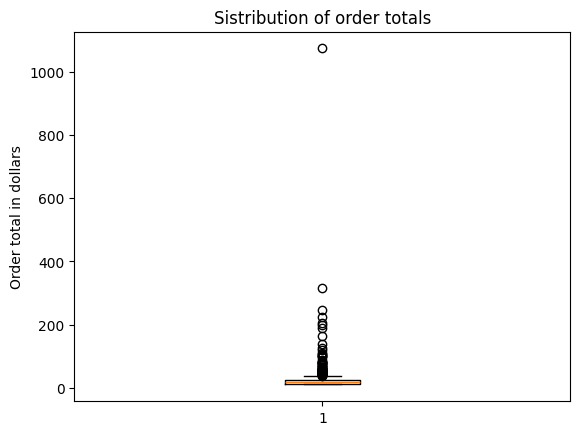

In [33]:
order_totals = chipo.groupby("order_id")["revenue"].sum()
display(order_totals)

## boxplot of order totals

import matplotlib.pyplot as plt

plt.boxplot(order_totals)
plt.title("Sistribution of order totals")
plt.ylabel("Order total in dollars")
plt.show()


In [111]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   object 
 5   clean_price         4622 non-null   float64
 6   revenue             4622 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 252.9+ KB


In [34]:
## clean the outliers on the item price
## outlier < Q1 - 1.5 (Q3-Q1) or > Q3 + 1.5 (Q3 -Q1)

Q1 = chipo["clean_price"].quantile(0.25)
Q3 = chipo["clean_price"].quantile(0.75)

lower_bound  = Q1 - 1.5 *(Q3-Q1)
upper_bound  = Q3 + 1.5 * (Q3-Q1)

mask_chipo_no_outliers = ((chipo["clean_price"] >= lower_bound) & (chipo["clean_price"] <= upper_bound))
chipo_no_outliers = chipo[mask_chipo_no_outliers]
chipo_no_outliers

,order_id,quantity,item_name,choice_description,item_price,clean_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,33.96
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75,8.75


In [35]:
## percentage of outliers

1- len(chipo_no_outliers)/len(chipo)

0.01276503678061447

Here, we created a DataFrame that we called _data_ and then we exported it in csv in the Download folder of our machine. By the way, we called the file "data.csv" specifying the path at the same time.

In the same way as for the import, you can export in several types of files, here are the main ones :


<table>
  <tr>
    <td>
      <strong>File</strong>
    </td>
    <td>
      <strong>Method</strong>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://en.wikipedia.org/wiki/Comma-separated_values">CSV</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv">
        to_csv
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="http://www.json.org/">JSON</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-writer">
        to_json
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://en.wikipedia.org/wiki/HTML">HTML</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-html">
        to_html
      </a>
    </td>
  </tr>
  <tr>
    <td>Local clipboard</td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-clipboard">
        to_clipboard
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://en.wikipedia.org/wiki/Microsoft_Excel">MS Excel</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel-writer">
        to_excel
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://support.hdfgroup.org/HDF5/whatishdf5.html">
        HDF5 Format
      </a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5">
        to_hdf
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://github.com/wesm/feather">Feather Format</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-feather">
        to_feather
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://parquet.apache.org/">Parquet Format</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-parquet">
        to_parquet
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="http://msgpack.org/index.html">Msgpack</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-msgpack">
        to_msgpack
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://en.wikipedia.org/wiki/Stata">Stata</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-stata-writer">
        to_stata
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://docs.python.org/3/library/pickle.html">
        Python Pickle Format
      </a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-pickle">
        to_pickle
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://en.wikipedia.org/wiki/SQL">SQL</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-sql">
        to_sql
      </a>
    </td>
  </tr>
  <tr>
    <td>
      <a href="https://en.wikipedia.org/wiki/BigQuery">Google Big Query</a>
    </td>
    <td>
      <a href="http://pandas.pydata.org/pandas-docs/stable/io.html#io-bigquery">
        to_gbq
      </a>
    </td>
  </tr>
</table>

## Manipulate datas

In [37]:
data2

,name,age,job
0,Agnes,28,web analyst
1,Sidi,37,sales director
2,Thibault,43,web analyst
3,Samia,33,sales director
4,Henry,29,web analyst
5,Georges,57,developer


In [36]:
## add a new column

data2["gender"] =["F", "M", "M", "F", "NB", "F"]
data2

,name,age,job,gender
0,Agnes,28,web analyst,F
1,Sidi,37,sales director,M
2,Thibault,43,web analyst,M
3,Samia,33,sales director,F
4,Henry,29,web analyst,NB
5,Georges,57,developer,F


In [37]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6 non-null      object
 1   age     6 non-null      int64 
 2   job     6 non-null      object
 3   gender  6 non-null      object
dtypes: int64(1), object(3)
memory usage: 324.0+ bytes


In [38]:
# Add new row to the DataFrame
new_row = {"name": "Theodora",
            "age": 37, 
            "job": "software developer", 
            "gender": "F"}

data2 = pd.concat([data2, pd.DataFrame(new_row, index=[0])], ignore_index=True)
data2

,name,age,job,gender
0,Agnes,28,web analyst,F
1,Sidi,37,sales director,M
2,Thibault,43,web analyst,M
3,Samia,33,sales director,F
4,Henry,29,web analyst,NB
5,Georges,57,developer,F
6,Theodora,37,software developer,F


In [39]:
# Add new row at the end of the DataFrame


#### Lambda and apply functions

In [40]:
# Add a column with values that are calculated according to another column: apply/lambda functions

# New column containing the square of the age
data2["square_age"] = data2["age"].apply(lambda x: x**2)
data2
# New column containing: age if age > 30, nan otherwise
data2["age_smaller"] = data2["age"].apply(lambda x: x if x >30 else None )
data2
# New column indicating that the person is NOT a web analyst
data2["not_wba"] = data2.job.apply(lambda x: x != "web analyst")
data2 


,name,age,job,gender,square_age,age_smaller,not_wba
0,Agnes,28,web analyst,F,784,NaN,False
1,Sidi,37,sales director,M,1369,37.0,True
2,Thibault,43,web analyst,M,1849,43.0,False
3,Samia,33,sales director,F,1089,33.0,True
4,Henry,29,web analyst,NB,841,NaN,False
5,Georges,57,developer,F,3249,57.0,True
6,Theodora,37,software developer,F,1369,37.0,True


### Change the structure of the database

#### GroupBy and aggregate functions

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/GROUP_BY-sum.jpg" />

In [41]:
display(data2.job.value_counts())
display(data2.gender.value_counts())

job
web analyst           3
sales director        2
developer             1
software developer    1
Name: count, dtype: int64

gender
F     4
M     2
NB    1
Name: count, dtype: int64

In [42]:
data2

,name,age,job,gender,square_age,age_smaller,not_wba
0,Agnes,28,web analyst,F,784,NaN,False
1,Sidi,37,sales director,M,1369,37.0,True
2,Thibault,43,web analyst,M,1849,43.0,False
3,Samia,33,sales director,F,1089,33.0,True
4,Henry,29,web analyst,NB,841,NaN,False
5,Georges,57,developer,F,3249,57.0,True
6,Theodora,37,software developer,F,1369,37.0,True


In [43]:
data2.groupby?

Signature:
data2.groupby(
    by=None,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    level: 'IndexLabel | None' = None,
    as_index: 'bool' = True,
    sort: 'bool' = True,
    group_keys: 'bool' = True,
    observed: 'bool | lib.NoDefault' = <no_default>,
    dropna: 'bool' = True,
) -> 'DataFrameGroupBy'
Docstring:
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, pd.Grouper or list of such
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If a list or ndarray of len

In [44]:
# Aggregate lines with groupby:

# Group by 'job' and then calculate the average value of the other columns
display(data2.groupby("job").mean(numeric_only=True))
# Group by 'job' then calculate the average value of the 'age' column.
display(data2.groupby("job")["age"].mean())

# Group by 'job' then 'gender' and calculate the median value of the other columns.
display(data2.groupby(["job", "gender"]).median(numeric_only=True))

,age,square_age,age_smaller,not_wba
job,,,,
developer,57.000000,3249.0,57.0,1.0
sales director,35.000000,1229.0,35.0,1.0
software developer,37.000000,1369.0,37.0,1.0
web analyst,33.333333,1158.0,43.0,0.0


job
developer             57.000000
sales director        35.000000
software developer    37.000000
web analyst           33.333333
Name: age, dtype: float64

age  square_age  age_smaller  not_wba
job                gender                                        
developer          F       57.0      3249.0         57.0      1.0
sales director     F       33.0      1089.0         33.0      1.0
                   M       37.0      1369.0         37.0      1.0
software developer F       37.0      1369.0         37.0      1.0
web analyst        F       28.0       784.0          NaN      0.0
                   M       43.0      1849.0         43.0      0.0
                   NB      29.0       841.0          NaN      0.0

In [45]:
data2

,name,age,job,gender,square_age,age_smaller,not_wba
0,Agnes,28,web analyst,F,784,NaN,False
1,Sidi,37,sales director,M,1369,37.0,True
2,Thibault,43,web analyst,M,1849,43.0,False
3,Samia,33,sales director,F,1089,33.0,True
4,Henry,29,web analyst,NB,841,NaN,False
5,Georges,57,developer,F,3249,57.0,True
6,Theodora,37,software developer,F,1369,37.0,True


#### Pivot

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/reshaping_pivot.png" />

In [46]:
data2

,name,age,job,gender,square_age,age_smaller,not_wba
0,Agnes,28,web analyst,F,784,NaN,False
1,Sidi,37,sales director,M,1369,37.0,True
2,Thibault,43,web analyst,M,1849,43.0,False
3,Samia,33,sales director,F,1089,33.0,True
4,Henry,29,web analyst,NB,841,NaN,False
5,Georges,57,developer,F,3249,57.0,True
6,Theodora,37,software developer,F,1369,37.0,True


In [47]:
# Rearrange rows and columns with pivot_table :

# DataFrame with :
# - as many rows as there are 'jobs'
# - as many columns as there is gender
# - the values are the average of 'age'
data2.pivot_table(index="job", columns ="gender", values="age", aggfunc="mean")

gender,F,M,NB
job,,,
developer,57.0,NaN,NaN
sales director,33.0,37.0,NaN
software developer,37.0,NaN,NaN
web analyst,28.0,43.0,29.0


### Combine databases

In [48]:
# Next, we will manipulate the following databases:
data_sales1 = {
    'sales_id' : ['001','002','003','004'],
    'people_id' : [1, 4, 2, 1],
    'product_id' : ['X789', 'X999', 'X789', 'X990']
              }

data_sales2 = {
    'sales_id' : ['005', '006', '007'],
    'people_id' : [0, 3, 2],
    'product_id' : ['X789', 'X999', 'X789']
               }

data_products = {
    'product_id' : ['X789', 'X999', 'X990'],
    'product_desc' : ['Apple', 'Banana', 'Orange']
                }

data_people = {
    'id' : [0, 1, 2, 3, 5],
    'name' : ['Paul','Perrine','Moussa','Michel', 'Anne'],
    'age' : [None, 67, 24, 76, 47]
              }

df_sales1 = pd.DataFrame(data_sales1)
df_sales2 = pd.DataFrame(data_sales2)
df_products = pd.DataFrame(data_products)
df_people = pd.DataFrame(data_people)

display(df_sales1)
display(df_sales2)
display(df_products)
display(df_people)


,sales_id,people_id,product_id
0,001,1,X789
1,002,4,X999
2,003,2,X789
3,004,1,X990


,sales_id,people_id,product_id
0,005,0,X789
1,006,3,X999
2,007,2,X789


,product_id,product_desc
0,X789,Apple
1,X999,Banana
2,X990,Orange


,id,name,age
0,0,Paul,NaN
1,1,Perrine,67.0
2,2,Moussa,24.0
3,3,Michel,76.0
4,5,Anne,47.0


#### Concatenate lines

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/merging_concat_basic.png" />

In [49]:
# Concatenate the lines of df_sales2 after df_sales1 :
df_sales = pd.concat([df_sales1, df_sales2], ignore_index=True)
df_sales

,sales_id,people_id,product_id
0,001,1,X789
1,002,4,X999
2,003,2,X789
3,004,1,X990
4,005,0,X789
5,006,3,X999
6,007,2,X789


#### Join operations

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/merging_merge_on_key.png" />

In [50]:
df_sales

,sales_id,people_id,product_id
0,001,1,X789
1,002,4,X999
2,003,2,X789
3,004,1,X990
4,005,0,X789
5,006,3,X999
6,007,2,X789


In [51]:
df_products

,product_id,product_desc
0,X789,Apple
1,X999,Banana
2,X990,Orange


In [52]:
# Join columns from sales and product
# Simple case: All product_id in df_sales are present in df_product and vice versa
df_sales_product = df_sales.merge(df_products, on = "product_id")
df_sales_product

,sales_id,people_id,product_id,product_desc
0,001,1,X789,Apple
1,002,4,X999,Banana
2,003,2,X789,Apple
3,004,1,X990,Orange
4,005,0,X789,Apple
5,006,3,X999,Banana
6,007,2,X789,Apple


In [53]:
df_people

,id,name,age
0,0,Paul,NaN
1,1,Perrine,67.0
2,2,Moussa,24.0
3,3,Michel,76.0
4,5,Anne,47.0


In [54]:
# Join columns from people with sales_product
# Warning 1: the columns containing the join id do not have the same name
# Warning 2: the people_id 4 present in df_sales_product does not exist in df_people!
# People_id 5 is in df_people but not in df_sales_product
# We have to make a choice: what to do with the missing ids?

# Inner join: we only keep the ids that are in both tables
df_final1 = df_sales_product.merge(df_people, left_on = "people_id" , right_on="id", how = "inner").drop(columns="id")
display(df_final1)

# Outer join: we keep all the ids we find in both tables and fill the missing values in with NaN
df_final2 = df_sales_product.merge(df_people, left_on="people_id", right_on="id", how = "outer")
display(df_final2 )
# Left join: we keep all the ids from the left table and fill the mising values with NaN
df_final3 = df_sales_product.merge(df_people, left_on="people_id", right_on="id", how = "left")
display(df_final3)

# right join: we keep all the ids from the left table and fill the mising values with NaN
df_final4 = df_sales_product.merge(df_people, left_on="people_id", right_on="id", how = "right")
display(df_final4)

,sales_id,people_id,product_id,product_desc,name,age
0,001,1,X789,Apple,Perrine,67.0
1,003,2,X789,Apple,Moussa,24.0
2,004,1,X990,Orange,Perrine,67.0
3,005,0,X789,Apple,Paul,NaN
4,006,3,X999,Banana,Michel,76.0
5,007,2,X789,Apple,Moussa,24.0


,sales_id,people_id,product_id,product_desc,id,name,age
0,005,0.0,X789,Apple,0.0,Paul,NaN
1,001,1.0,X789,Apple,1.0,Perrine,67.0
2,004,1.0,X990,Orange,1.0,Perrine,67.0
3,003,2.0,X789,Apple,2.0,Moussa,24.0
4,007,2.0,X789,Apple,2.0,Moussa,24.0
5,006,3.0,X999,Banana,3.0,Michel,76.0
6,002,4.0,X999,Banana,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,5.0,Anne,47.0


,sales_id,people_id,product_id,product_desc,id,name,age
0,001,1,X789,Apple,1.0,Perrine,67.0
1,002,4,X999,Banana,NaN,NaN,NaN
2,003,2,X789,Apple,2.0,Moussa,24.0
3,004,1,X990,Orange,1.0,Perrine,67.0
4,005,0,X789,Apple,0.0,Paul,NaN
5,006,3,X999,Banana,3.0,Michel,76.0
6,007,2,X789,Apple,2.0,Moussa,24.0


,sales_id,people_id,product_id,product_desc,id,name,age
0,005,0.0,X789,Apple,0,Paul,NaN
1,001,1.0,X789,Apple,1,Perrine,67.0
2,004,1.0,X990,Orange,1,Perrine,67.0
3,003,2.0,X789,Apple,2,Moussa,24.0
4,007,2.0,X789,Apple,2,Moussa,24.0
5,006,3.0,X999,Banana,3,Michel,76.0
6,NaN,NaN,NaN,NaN,5,Anne,47.0


In [55]:
df_people

,id,name,age
0,0,Paul,NaN
1,1,Perrine,67.0
2,2,Moussa,24.0
3,3,Michel,76.0
4,5,Anne,47.0


In [56]:
df_sales_product

,sales_id,people_id,product_id,product_desc
0,001,1,X789,Apple
1,002,4,X999,Banana
2,003,2,X789,Apple
3,004,1,X990,Orange
4,005,0,X789,Apple
5,006,3,X999,Banana
6,007,2,X789,Apple


In [57]:
df_final4
## when you have nans you can clan them --> replace the nan by the average

df_final4["age"] = df_final4.age.fillna(df_final4.age.mean(), inplace=True)
df_final4


/var/folders/lw/9stf5nqd2kjgyfwhgwq8qs_w0000gn/T/ipykernel_81834/2204768573.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final4["age"] = df_final4.age.fillna(df_final4.age.mean(), inplace=True)


,sales_id,people_id,product_id,product_desc,id,name,age
0,005,0.0,X789,Apple,0,Paul,None
1,001,1.0,X789,Apple,1,Perrine,None
2,004,1.0,X990,Orange,1,Perrine,None
3,003,2.0,X789,Apple,2,Moussa,None
4,007,2.0,X789,Apple,2,Moussa,None
5,006,3.0,X999,Banana,3,Michel,None
6,NaN,NaN,NaN,NaN,5,Anne,None


,sales_id,people_id,product_id,product_desc,id,name,age
0,001,1,X789,Apple,1.0,Perrine,67.0
1,003,2,X789,Apple,2.0,Moussa,24.0
2,005,0,X789,Apple,0.0,Paul,NaN
3,007,2,X789,Apple,2.0,Moussa,24.0
4,002,4,X999,Banana,NaN,NaN,NaN
5,006,3,X999,Banana,3.0,Michel,76.0
6,004,1,X990,Orange,1.0,Perrine,67.0


## Ressources 📚📚

- How to learn Pandas - [https://bit.ly/2CDDc4Z](https://bit.ly/2CDDc4Z)
- Missing values - [https://bit.ly/2yK66w2](https://bit.ly/2yK66w2)
- Interpolation - [https://bit.ly/2RW2y2u](https://bit.ly/2RW2y2u)
- Categorical variables - [https://bit.ly/2CK313e](https://bit.ly/2CK313e)
- Dummy variable trap - [https://bit.ly/4jx5gro](https://bit.ly/4jx5gro)
- Group By - [https://bit.ly/2EpF5DW](https://bit.ly/2EpF5DW)
- Handling multiple databases - [https://bit.ly/2PAUkLD](https://bit.ly/2PAUkLD)